In [19]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from statistics import mean
import torch
import torchvision
import torch.nn as nn
from torch.nn import functional as F
from torchvision import transforms
import librosa
import librosa.display
import torchaudio

import preprocess
import utils

plt.rcParams['figure.figsize'] = [30, 20]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = preprocess.load_metadata()




In [35]:
sample_n = 424
raw_sample = preprocess.load_and_transform(data[sample_n][0], False)
mel_sample = preprocess.load_and_transform(data[sample_n][0], True)
print(data[sample_n][1])





At one time the Marshalsea was the receptacle of pirates, but none were committed to it after 1789.


torch.Size([1, 176029])


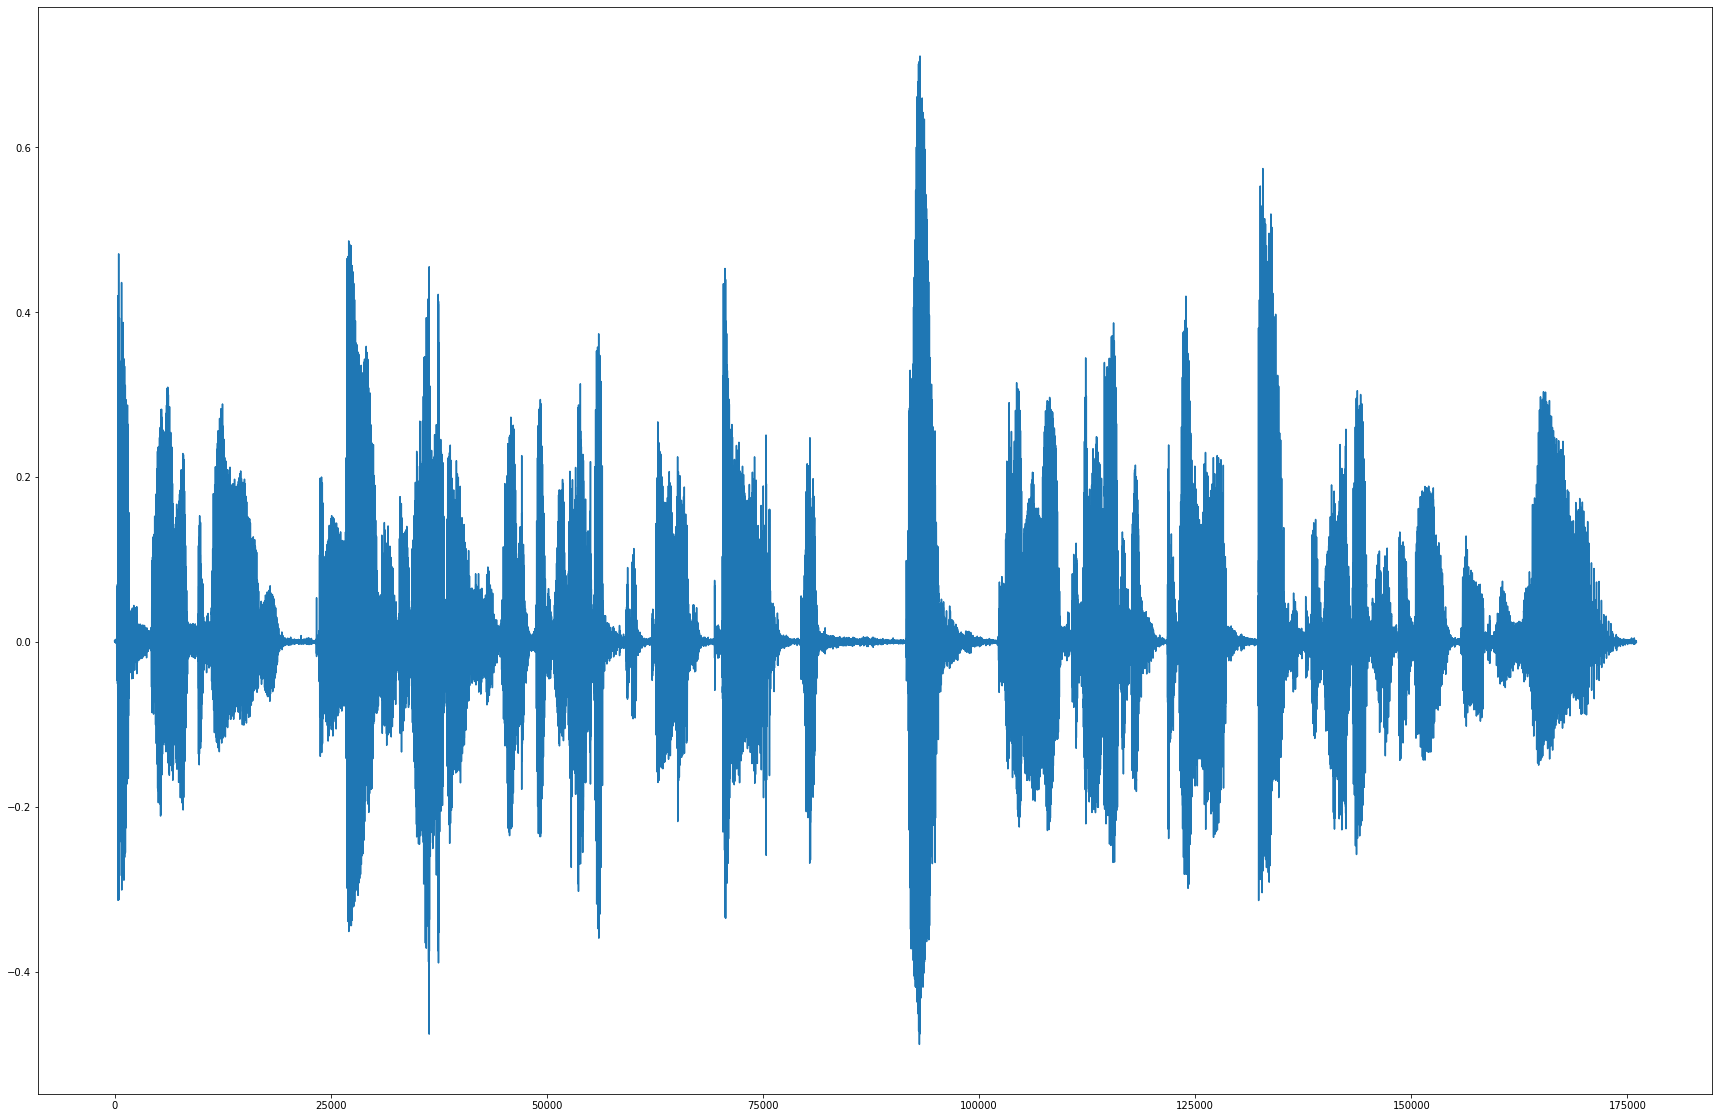

In [36]:
print(raw_sample.shape)
plt.plot(raw_sample.squeeze())





torch.Size([80, 400])


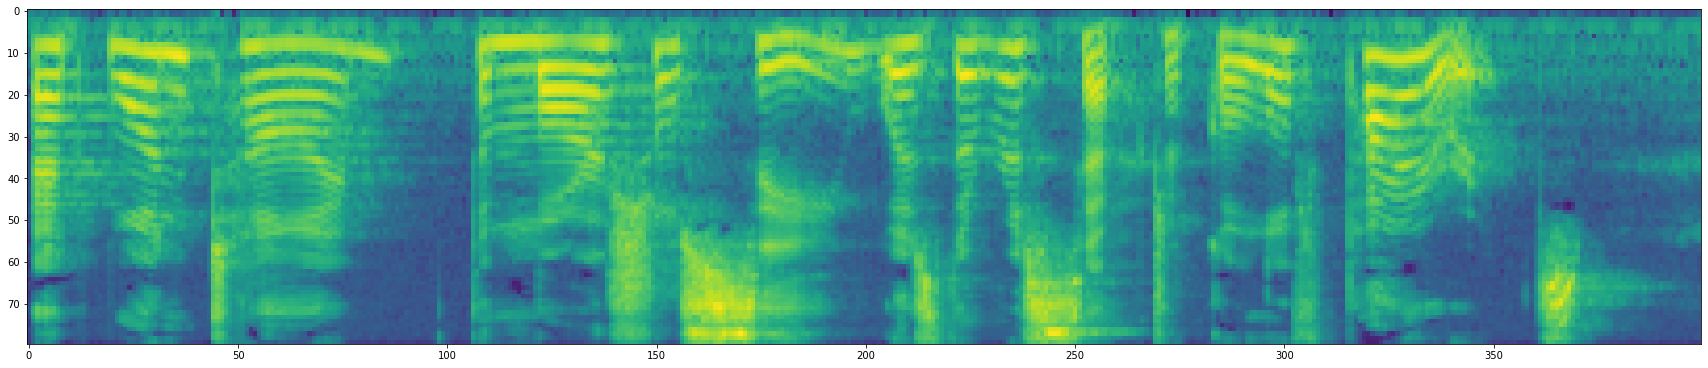

In [37]:
print(mel_sample.shape)
plt.imshow(torch.log10(mel_sample))




(12, 344)


/var/folders/wh/jwc03s_96l93f7jyblm_8q9m0000gn/T/ipykernel_34943/2148180444.py:4: FutureWarning: Pass y=[ 1.0375977e-03  1.0375977e-03  1.1596680e-03 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)


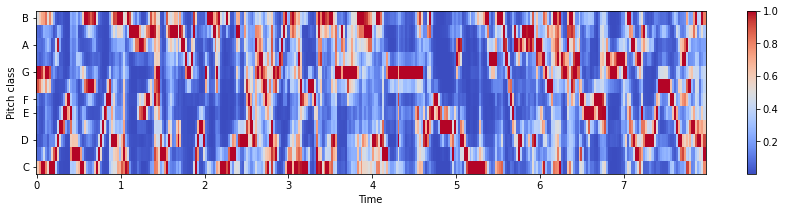

In [40]:
sr = 22000
hop_length = 512
x = np.array(raw_sample.squeeze())
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
print((chromagram).shape)
fig, ax = plt.subplots(figsize=(15, 3))
img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
fig.colorbar(img, ax=ax)






In [66]:
s = mel_sample.reshape(-1)

b = max(s)
s = min(s)
a = s.mean()


print(f"Max: {b}, min: {s}, mean: {a}")

Max: 799.3278198242188, min: 2.1752539325348152e-08, mean: 2.1752539325348152e-08
